# EDA To Prediction(DieTanic)

##### "이유한님의 캐글 코리아 캐글 스터디 커널 커리큘럼"에 따라 필사한 내용입니다.

- 필사 노트북의 원 출처 : https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

### Why is the name DieTanic?
- 1912년 4월 15일, 빙하에 의해 2224명의 승객 중 1502명이 죽은 악명 높은 난파 사고이기 때문이다.

#### - Tatanic data는 kaggle conpatition에 처음 참여해서 공부하기 좋은 데이터이다.
#### - "DieTanic"은 모델링을 통해 어떤 결과를 예측할 때 워크플로우에 대한 기본적인 아이디어를 제공한다.

### DieTanic의 목차

1. Exploratory Data Analysis(EDA)<br>
  1) Anaylsis of the features.<br>
  2) Finding any relations or trends considering multiple features.<br>
  <br>
2. Feature Engineering and Data Cleaning<br>
  1) Adding any few features.<br>
  2) Removing redundent features.<br>
  3) Converting features into suitable from for modeliing<br>
  <br>
3. Predictive Modeling<br>
  1) Running Basic Algorithms.<br>
  2) Cross Validation.<br>
  3) Ensembling.<br>
  4) Important Features Extraction.<br>

## 1. Exploratory Data Analysis - EDA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 13.3 MB 9.9 MB/s            
  Using cached numpy-1.22.4-cp38-cp38-macosx_11_0_arm64.whl (12.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [7]:
# data load
data = pd.read_csv("./dataset/titanic/train.csv")

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# dataset null check
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터 중 null 값이 존재하는 열은 Age, Cabin, Embarked이다. 노트 저자는 이것을 어떻게 처리할까?

###### How many Survived?

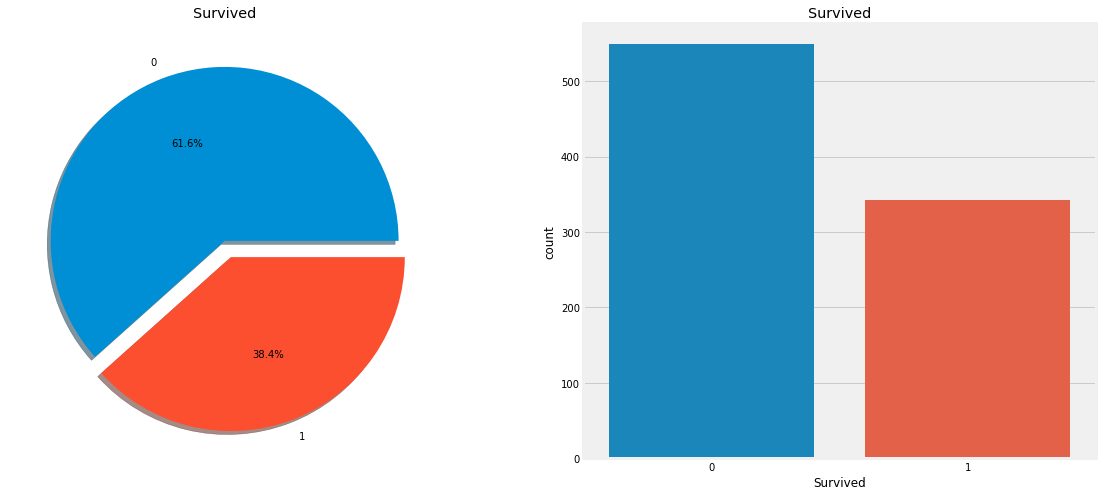

In [13]:
# 1 x 2 개의 그래프를 넣을 수 있는 subplot 생성
f, ax = plt.subplots(1, 2, figsize = (18,8))

# [0,0] 위치에 pie plot 생성
data["Survived"].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%",
                                         ax = ax[0], shadow = True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

# [0,1] 위치에 bar plot 생성
sns.countplot("Survived", data = data, ax = ax[1])
ax[1].set_title("Survived")
plt.show()

1. 데이터셋 description
2. 분석 기법의 **간략한 이론**
3. 라이브러리 사용법
4. 해당 커널의 특징(다른 커널과의 차별점)
5. 배운점 및 어려웠던 점